In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

import sklearn

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import cufflinks as cf
cf.set_config_file(offline=True, sharing=False, theme='ggplot');
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
orig_abridged_counties = pd.read_csv('abridged_couties.csv')
orig_USdeaths = pd.read_csv('time_series_covid19_deaths_US.csv')
orig_UScases = pd.read_csv('time_series_covid19_confirmed_US.csv')
orig_states = pd.read_csv('4.18states.csv')

# Initial Exploratory Data Analysis

In [5]:
#summing overall number of deaths by state so I can do an initial visualization of state deaths
deaths_summed_by_state = orig_USdeaths[['Province_State', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/17/20', '4/18/20']].groupby(by='Province_State').sum().reset_index()

In [6]:
#melted so I can make states the 'hue' on my visualization
summed_by_state_melted = deaths_summed_by_state.melt(id_vars=['Province_State'], value_vars=['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/17/20', '4/18/20'])
#convert to datetime 
summed_by_state_melted['variable'] = pd.to_datetime(summed_by_state_melted['variable'])
summed_by_state_melted.head()

,Province_State,variable,value
0,Alabama,2020-01-22,0
1,Alaska,2020-01-22,0
2,American Samoa,2020-01-22,0
3,Arizona,2020-01-22,0
4,Arkansas,2020-01-22,0


/srv/conda/envs/data100/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 1.0, 'Covid-19 Deaths by State')

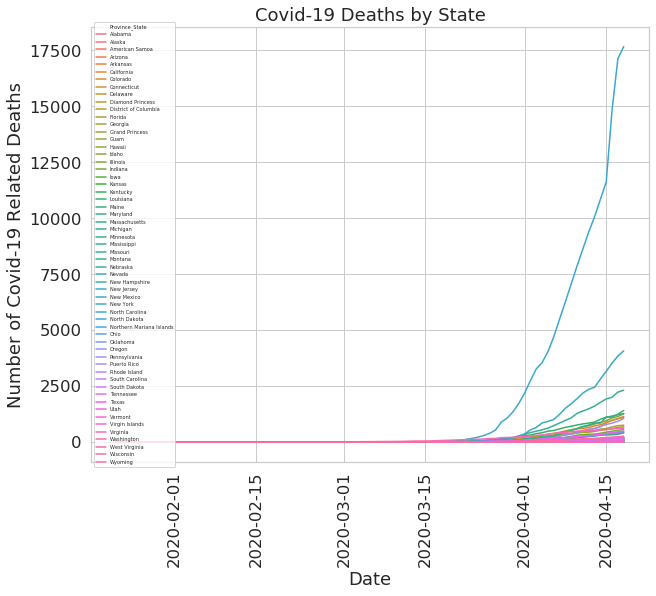

In [7]:
plt.figure(figsize=(10,8))
sns.lineplot(x='variable', y='value', hue='Province_State', data=summed_by_state_melted)
plt.legend(loc='center left', fontsize=5)
plt.xlabel('Date')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation=90)
plt.ylabel('Number of Covid-19 Related Deaths')
plt.title('Covid-19 Deaths by State')

In [8]:
#visualizing states with highest & lowest death count
top_state_cases = summed_by_state_melted.loc[summed_by_state_melted['Province_State'].isin(['California', 'New York', 'Washington', 'New Jersey', 'Massachusetts','Illinois', 'Michigan'])]
lowest_state_cases = summed_by_state_melted.loc[summed_by_state_melted['Province_State'].isin(['Alaska', 'Montana', 'Hawaii','Wyoming', 'Vermont'])]

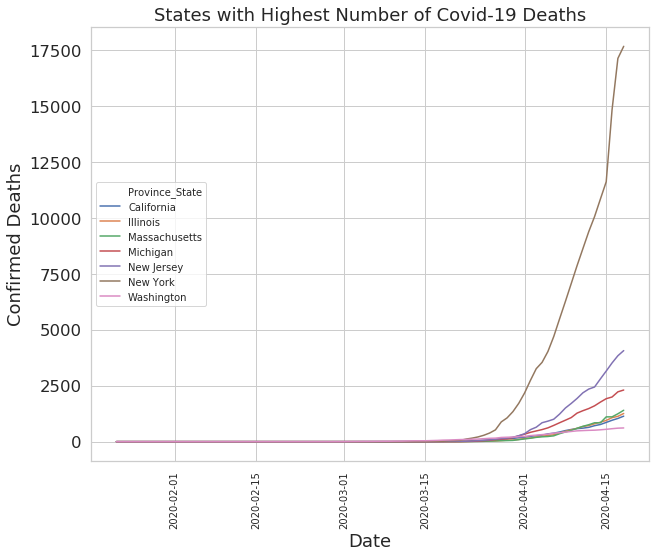

In [9]:
#visualizing states with highest death count
plt.figure(figsize=(10,8))
sns.lineplot(x='variable', y='value', hue='Province_State', data=top_state_cases)
plt.xlabel('Date')
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation=90)
plt.ylabel('Confirmed Deaths')
plt.legend(loc='center left', fontsize=10)
plt.title('States with Highest Number of Covid-19 Deaths');

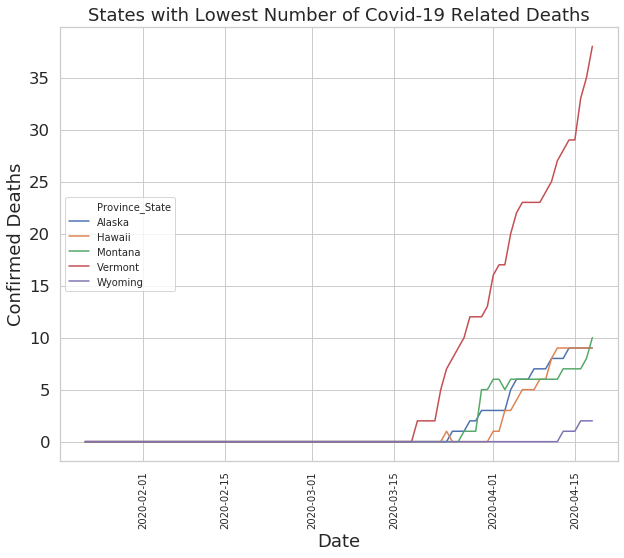

In [10]:
#visualizing states with lowest death count
plt.figure(figsize=(10,8))
sns.lineplot(x='variable', y='value', hue='Province_State', data=lowest_state_cases)
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.legend(loc='center left', fontsize=10)
plt.title('States with Lowest Number of Covid-19 Related Deaths');

One of my hypotheses on a feature that could be informative in predicting the mortality rate of a state has to do with the number of nursing homes. My mom works at a hospital with a lot of nursing homes in the region and they happen to have a statistically high count of Covid-19 cases and she was curious if this feature of their environment had anything to do with it. So, I wanted to include this feature in the training data for my model. Below, I loaded data from https://www.kff.org/other/state-indicator/number-of-nursing-facilities/?currentTimeframe=0&selectedDistributions=number-of-nursing-facilities&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D which has the count of nursing homes by state.  

In [11]:
# Nursing home data from https://www.kff.org/other/state-indicator/number-of-nursing-facilities/?currentTimeframe=0&selectedDistributions=number-of-nursing-facilities&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
nursing_homes = pd.read_csv('nursing_home_countbystate.csv')

In [12]:
nursing_homes.sort_values(by='Number of Nursing Homes in 2017').head(5)

,State,Number of Nursing Homes in 2017
1,Alaska,18
8,District of Columbia,18
45,Vermont,36
50,Wyoming,38
11,Hawaii,42


Interestingly, the 4 out of 5 states with the lowest number of nursing homes are also 4 out of the 5 states with the lowest number of Covid-19 related deaths. Could be a good sign!

# Data Cleaning

In [13]:
#dropping redundant features and those that don't have to do with the hypotheses I am testing
new_abridged_counties = orig_abridged_counties.drop(columns=['POP_LATITUDE', 'POP_LONGITUDE','PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017','PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010'])

The data cleaning I have done in the cell below was motivated by manual inspection of null StateName values. I noticed that in many records with AK (or HI, VA) as their state abbreviation had the StateName as NaN so I filled them with the appropriate corresponding state name because that is what I want to group by later on to merge different dataframes.

In [15]:
New_abridged_counties = orig_abridged_counties.drop(columns= ['countyFIPS', 'STATEFP',
    'COUNTYFP', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE'])
alaska_indexes = New_abridged_counties[New_abridged_counties['StateName']=='AK'].index
hawaii_indexes = New_abridged_counties[New_abridged_counties['StateName']=='HI'].index
virginia_indexes = New_abridged_counties[New_abridged_counties['StateName']=='VA'].index
New_abridged_counties = New_abridged_counties.set_value(alaska_indexes, 'State', 'Alaska')
New_abridged_counties = New_abridged_counties.set_value(hawaii_indexes, 'State', 'Hawaii')
New_abridged_counties = New_abridged_counties.set_value(virginia_indexes, 'State', 'Virginia')

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [16]:
#renaming Province_State featuer to 'State' to make merging easier
new_orig_states = orig_states.rename(columns={'Province_State':'State'})

Below, I have merged the dataframes that contain the features I want to use to train my model.

In [17]:
#combining new_abridged_counties, orig_states, and nursing_homes datasets into one DataFrame to train my model
combo_abridged_counties_and_states = New_abridged_counties.merge(new_orig_states, on='State')
combo_abridged_counties_and_states = combo_abridged_counties_and_states.merge(nursing_homes, on='State')
combo_abridged_counties_and_states.head()

,CountyName,StateName,State,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,...,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Number of Nursing Homes in 2017
0,Autauga,AL,Alabama,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,...,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895,228
1,Baldwin,AL,Alabama,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,...,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895,228
2,Barbour,AL,Alabama,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,...,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895,228
3,Bibb,AL,Alabama,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,...,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895,228
4,Blount,AL,Alabama,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,...,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895,228


In [18]:
#taking out redundant features
combo_abridged_counties_and_states = combo_abridged_counties_and_states.drop(columns={'StateName', 'FIPS', 'UID', 'ISO3'})

In [18]:
#aggregating data by state (taking the mean as opposed to the sum because states have various sizes/pops and 
#adding their information would result in larger states having more extreme values)
combo_abridged_states = combo_abridged_counties_and_states.groupby(by=['State']).agg('mean').drop(columns={'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010'}) 
        #dropping male/female info because I want to focus my testing on landscape features and policy
#visualizing null values
print(combo_abridged_states.isnull().sum())

Rural-UrbanContinuumCode2013       0
PopulationEstimate2018             0
PopTotalMale2017                   0
PopTotalFemale2017                 0
FracMale2017                       0
                                  ..
Mortality_Rate                     0
UID                                0
Testing_Rate                       0
Hospitalization_Rate               3
Number of Nursing Homes in 2017    0
Length: 62, dtype: int64


In [19]:
#dropping these columns because there are too many nans 
#and thus filling with 0 or averages has too high of a risk of skewing the data
training_data = combo_abridged_states.drop(columns={'3-YrMortalityAge<1Year2015-17', '3-YrMortalityAge1-4Years2015-17',
       '3-YrMortalityAge5-14Years2015-17', '3-YrMortalityAge15-24Years2015-17',
       '3-YrMortalityAge25-34Years2015-17',
       '3-YrMortalityAge35-44Years2015-17',
       '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Years2015-17',
       '3-YrMortalityAge65-74Years2015-17',
       '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17', 'Recovered',
       'mortality2015-17Estimated'})
#these are the states that never implemented stay at home orders
training_data[training_data['stay at home'].isnull()]
#I will fill their dates with today's date to simulate them not having one as covid progressed in their state
from datetime import datetime
now = datetime.now()
training_data['stay at home'] = training_data['stay at home'].fillna(value=now.toordinal())

#same for these states (never implemented restrictions on large gatherings)
training_data['>50 gatherings'] = training_data['>50 gatherings'].fillna(value=now.toordinal())
training_data['>500 gatherings'] = training_data['>500 gatherings'].fillna(value=now.toordinal())
training_data['entertainment/gym'] = training_data['entertainment/gym'].fillna(value=now.toordinal())


#HPSA scores have to do with FTE practitioners per population in the region... 
#they are caculated by county so because I am doing a state wide prediction model, I will take
#these features out for this training data
#hospitalization number and rate would be a biased feature so i will drop these columns as well

training_data = training_data.drop(columns={'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'People_Hospitalized', 'Hospitalization_Rate'})

print(training_data.isnull().sum())

Rural-UrbanContinuumCode2013        0
PopulationEstimate2018              0
PopTotalMale2017                    0
PopTotalFemale2017                  0
FracMale2017                        0
PopulationEstimate65+2017           0
PopulationDensityperSqMile2010      0
CensusPopulation2010                0
MedianAge2010                       0
#EligibleforMedicare2018            0
MedicareEnrollment,AgedTot2017      0
3-YrDiabetes2015-17                 0
DiabetesPercentage                  0
HeartDiseaseMortality               0
StrokeMortality                     0
Smokers_Percentage                  0
RespMortalityRate2014               0
#FTEHospitalTotal2017               0
TotalM.D.'s,TotNon-FedandFed2017    0
#HospParticipatinginNetwork2017     0
#Hospitals                          0
#ICU_beds                           0
dem_to_rep_ratio                    0
stay at home                        0
>50 gatherings                      0
>500 gatherings                     0
public schoo

In [22]:
possible_Y_cols = ['Confirmed', 'Deaths', 'Active',
       'Incident_Rate', 'Mortality_Rate']

In [20]:
#features to explore as a good set to train my model
X = training_data[['Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'stay at home',
       '>50 gatherings', '>500 gatherings', 'public schools',
       'restaurant dine-in', 'entertainment/gym', 'federal guidelines',
       'foreign travel ban', 'SVIPercentile',  'People_Tested', 'Testing_Rate',
       'Number of Nursing Homes in 2017']]

#my chosen variable to be predicted
Y = training_data['Mortality_Rate']

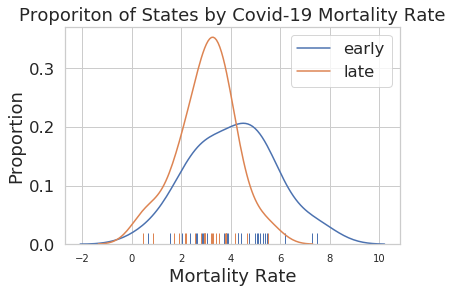

In [21]:
#visualizing whether the timing of when the stay at home order was instated had an effect on 
#overall mortality rate.
X_and_Y = X
X_and_Y['Mortality_Rate'] = Y

sah_median = X_and_Y['stay at home'].median()
X_and_Y['stay at home mid'] = (X_and_Y['stay at home']<=sah_median)

early = X_and_Y[(X_and_Y['stay at home mid']==True)]['Mortality_Rate']

late = X_and_Y[X_and_Y['stay at home mid']==False]['Mortality_Rate']

sns.distplot(early, label='early', hist=False, rug=True)
sns.distplot(late, label='late', hist=False, rug=True)
plt.xlabel('Mortality Rate')
plt.ylabel('Proportion')
plt.title('Proporiton of States by Covid-19 Mortality Rate')
plt.legend();

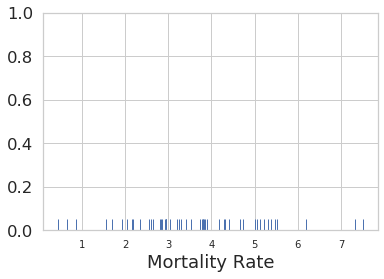

In [22]:
#visualizing overall distribution of the variable I want my model to predict
sns.rugplot(X_and_Y['Mortality_Rate'])
plt.xlabel('Mortality Rate');

States who implemented "Stay at Home" orders earlier than the average state versus later:


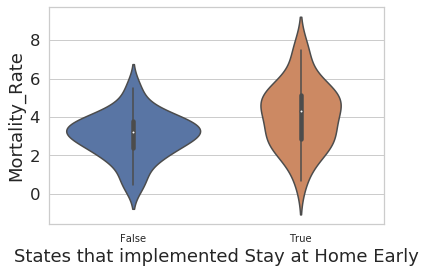

In [23]:
sns.violinplot(data=X_and_Y, x = 'stay at home mid', y = 'Mortality_Rate')
plt.xlabel('States that implemented Stay at Home Early');
print('States who implemented "Stay at Home" orders earlier than the average state versus later:')

Surprisingly the states that implemented stay at home orders earlier have, on average, higher mortality rates. This points to a hypothesis that these states have other factors (besides policy) that allowed for an increase in Covid-19 related deaths. So, next, I will look at whether there is a correlation between state's categorization on the rural-urban continuum has a correlation to their overall covid mortality rate. 

In [24]:
X_and_Y['Rural-UrbanContinuumCode2013'].sort_values(ascending=True).head()

State
Rhode Island    1.000000
New Jersey      1.333333
Connecticut     1.875000
Delaware        2.000000
Maryland        2.375000
Name: Rural-UrbanContinuumCode2013, dtype: float64

Text(0, 0.5, 'Mortality Rate')

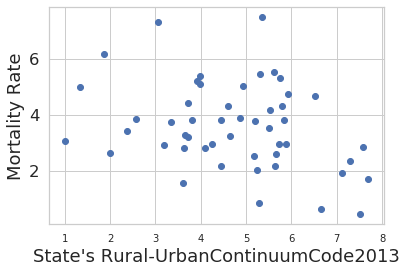

In [25]:
plt.scatter(X_and_Y['Rural-UrbanContinuumCode2013'], X_and_Y['Mortality_Rate'])
plt.xlabel("State's Rural-UrbanContinuumCode2013")
plt.ylabel('Mortality Rate')


<Figure size 1440x720 with 0 Axes>

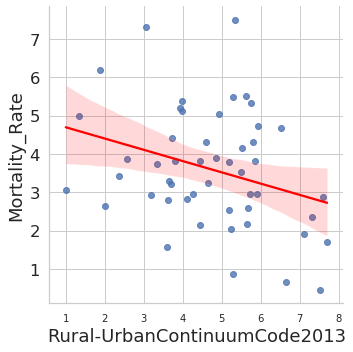

In [26]:
plt.figure(figsize=(20,10))
sns.lmplot('Rural-UrbanContinuumCode2013', 'Mortality_Rate', X_and_Y, line_kws={'color':'red'})
plt.show()

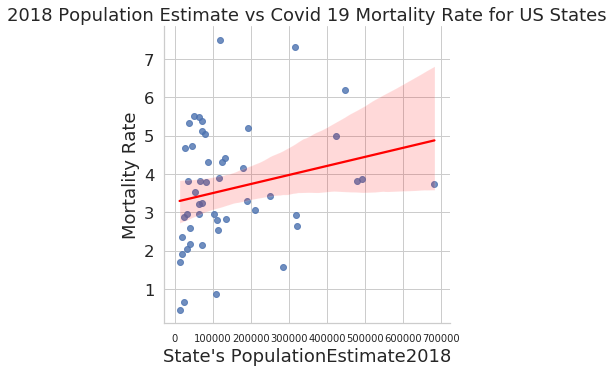

In [27]:
sns.lmplot(x='PopulationEstimate2018', y='Mortality_Rate', data=X_and_Y, fit_reg=True, line_kws={'color':'red'})
plt.xlabel("State's PopulationEstimate2018")
plt.ylabel('Mortality Rate')
plt.title('2018 Population Estimate vs Covid 19 Mortality Rate for US States');

Text(0.5, 1, 'Population Density vs. Mortality Rate for States in the US')

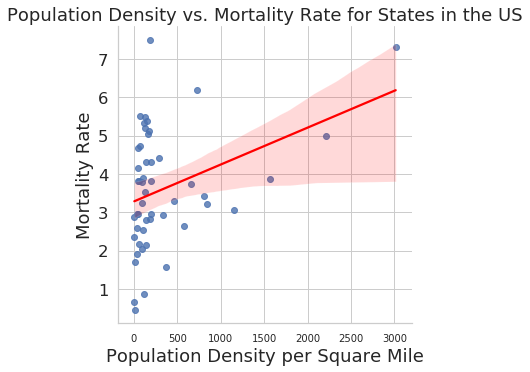

In [28]:
#X_and_Y.sort_values(by='PopulationDensityperSqMile2010').plot.line(x='PopulationDensityperSqMile2010', y='Mortality_Rate')
sns.lmplot(x='PopulationDensityperSqMile2010', y='Mortality_Rate', data=X_and_Y, fit_reg=True, line_kws={'color':'red'})
plt.ylabel('Mortality Rate')
plt.xlabel('Population Density per Square Mile')
plt.title('Population Density vs. Mortality Rate for States in the US')

Text(0.5, 6.799999999999979, 'PopulationEstimate65+2017')

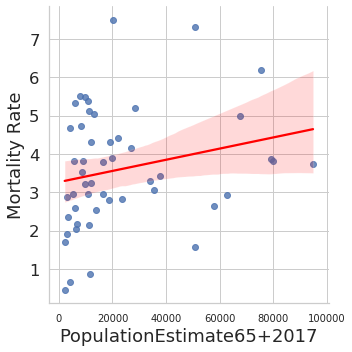

In [29]:
sns.lmplot(x='PopulationEstimate65+2017', y='Mortality_Rate', data=X_and_Y, fit_reg=True, line_kws={'color':'red'})
plt.ylabel('Mortality Rate')
plt.xlabel('PopulationEstimate65+2017')
#plt.title('Population Density vs. Mortality Rate for States in the US')

Text(0.5, 6.799999999999979, 'People_Tested')

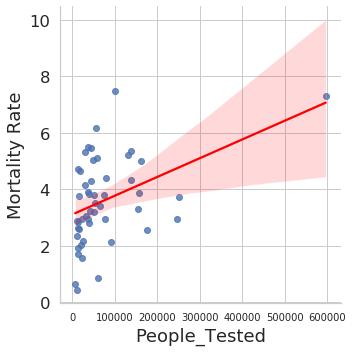

In [30]:
sns.lmplot(x='People_Tested', y='Mortality_Rate', data=X_and_Y, fit_reg=True, line_kws={'color':'red'})
plt.ylabel('Mortality Rate')
plt.xlabel('People_Tested')
#plt.title('Population Density vs. Mortality Rate for States in the US')

In [34]:
#scatterplot of states with their population density per square mile on the horizontal axis versus their overall Covid-19 Mortality Rate on the vertical axis. 
#The color of each point depicts a state’s average Rural-Urban Continuum Code (the mean of all county codes within a state)
fig = px.scatter(X_and_Y, x='PopulationDensityperSqMile2010', y='Mortality_Rate', color='Rural-UrbanContinuumCode2013')
fig.update_xaxes(title_text = 'Population Density per Square Mile in 2010')
fig.update_yaxes(title_text = 'Mortality Rate')
fig.update_layout(title='Population Density and Rural-Urban Continuum Code vs 2020 Covid-19 Mortality Rate for US States')
fig

In [32]:
#visualizing the date the state’s ‘Stay at Home’ order and was 
#implemented with points representing each state and colored by the state’s overall incident rate of Covid-19
X_and_Y['Incident Rate']=training_data['Incident_Rate']
fig = px.scatter(X_and_Y, x='stay at home', y='Mortality_Rate', color='Incident Rate')
fig.update_xaxes(title_text = 'Date Stay at Home order implemented (Gregorian Ordinal)')
fig.update_yaxes(title_text = 'Covid-19 Mortality Rate')
fig.update_layout(title='Date Stay at Home order put in place versus overall Covid-19 Mortality Rate')
fig

In [33]:
print(Y.min(), Y.max())

0.4539559014267178 7.495696794517882


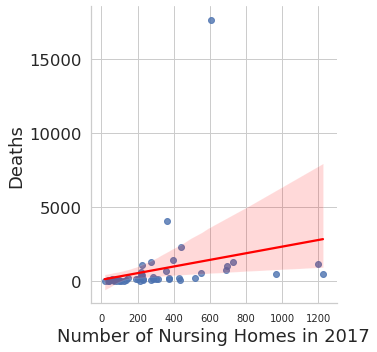

In [35]:
#another possible Y
X_and_Y['Deaths']= training_data['Deaths']
sns.lmplot('Number of Nursing Homes in 2017', 'Deaths', X_and_Y, line_kws={'color':'red'})

#shows huge outlier --> big skew of linear model so I will stick to mortality rate to provide easier comparisons.

In [36]:
X_and_Y.columns

Index(['Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'stay at home',
       '>50 gatherings', '>500 gatherings', 'public schools',
       'restaurant dine-in', 'entertainment/gym', 'federal guidelines',
       'foreign travel ban', 'SVIPercentile', 'People_Tested', 'Testing_Rate',
       'Number of Nursing Homes in 2017', 'Mortality_Rate', 'stay at home mid',
       'Incident Rate', 'Deaths'],
      dtype='object')

In [61]:
#training dataset 
data= X_and_Y.drop(columns={'stay at home mid',
       'Incident Rate', 'Deaths'})

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1, random_state=42)

#took out the line below because the data is so limited that i felt having less records to
#train my model would have resulted in worse performance on test data even though it is 
#the go-to strategy to test for overfitting in most cases
#tr, val = train_test_split(train, test_size=0.1, random_state=42)

X_train = train.drop(columns={'Mortality_Rate'})
Y_train = train['Mortality_Rate']

#standardizing data
normalized_X_train = (X_train-X_train.mean())/(X_train.std())
fed_zero_indices = normalized_X_train[normalized_X_train['federal guidelines'].isnull()].index
normalized_X_train = normalized_X_train.set_value(fed_zero_indices, 'federal guidelines', 0)
normalized_X_train = normalized_X_train.set_value(fed_zero_indices, 'foreign travel ban', 0)

In [62]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [67]:
X_train = train.drop(columns={'Mortality_Rate'})
Y_train = train['Mortality_Rate']
#standardizing data
normalized_X_train = (X_train-X_train.mean())/(X_train.std())
fed_zero_indices = normalized_X_train[normalized_X_train['federal guidelines'].isnull()].index
normalized_X_train = normalized_X_train.set_value(fed_zero_indices, 'federal guidelines', 0)
normalized_X_train = normalized_X_train.set_value(fed_zero_indices, 'foreign travel ban', 0)


linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(normalized_X_train, Y_train)
y_fitted= linear_model.predict(normalized_X_train)
training_error = rmse(Y_train, y_fitted)
print("Training RMSE: {}".format(training_error))
training_accuracy = linear_model.score(normalized_X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training RMSE: 0.855996194181621
Training Accuracy:  0.6945758728754495


/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [68]:
print(cross_val_score(linear_model, normalized_X_train, Y_train, scoring='neg_root_mean_squared_error', cv=5))
print(np.mean(cross_val_score(linear_model, normalized_X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')))

[-4.97640312 -3.03722781 -4.846153   -5.11352217 -4.95960772]
-4.58658276262351


In [69]:
#wanted to get an idea of the most influential featues (which ones if removed would cases a spike or decrease in neg rmse)
for i in normalized_X_train.columns:
    model = LinearRegression(fit_intercept=True)
    Xs = normalized_X_train.drop(columns={i})
    model.fit(Xs, Y_train)
    print(str(i), np.mean(cross_val_score(model, Xs, Y_train, cv=5, scoring='neg_root_mean_squared_error')))

Rural-UrbanContinuumCode2013 -3.9989357748370957
PopulationEstimate2018 -3.4730284414767114
PopulationEstimate65+2017 -4.097180446905809
PopulationDensityperSqMile2010 -4.299693032799522
MedianAge2010 -4.268751409672635
#EligibleforMedicare2018 -3.704544324377012
MedicareEnrollment,AgedTot2017 -3.7168727146494183
3-YrDiabetes2015-17 -3.8879681601129676
DiabetesPercentage -3.9862643680761516
HeartDiseaseMortality -4.355812235552255
StrokeMortality -4.499748396941108
Smokers_Percentage -4.4796439473131
RespMortalityRate2014 -4.599892022352873
#FTEHospitalTotal2017 -4.235577383842352
TotalM.D.'s,TotNon-FedandFed2017 -4.060402342598373
#HospParticipatinginNetwork2017 -7.346403413465815
#Hospitals -5.034519035205141
#ICU_beds -4.270292321704976
dem_to_rep_ratio -4.074825416885032
stay at home -4.936792985489438
>50 gatherings -3.4857664856225172
>500 gatherings -3.8398323325247103
public schools -4.942089918326296
restaurant dine-in -4.922489493349063
entertainment/gym -4.645388095597309
fe

In [47]:
#showed a lot of variation so I will try models with regularization / regularization+feature selection

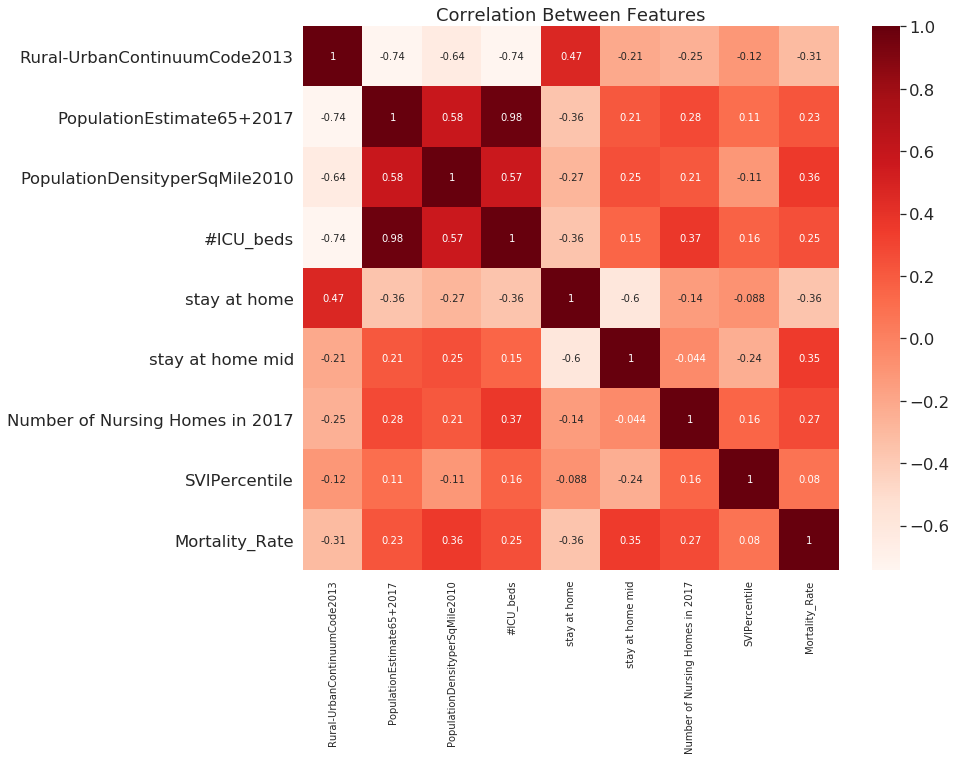

In [49]:
#visualizing features having to do with state's "environment"
data = X_and_Y[['Rural-UrbanContinuumCode2013', 'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
               '#ICU_beds', 'stay at home','stay at home mid', 'Number of Nursing Homes in 2017', 'SVIPercentile', 'Mortality_Rate']]
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

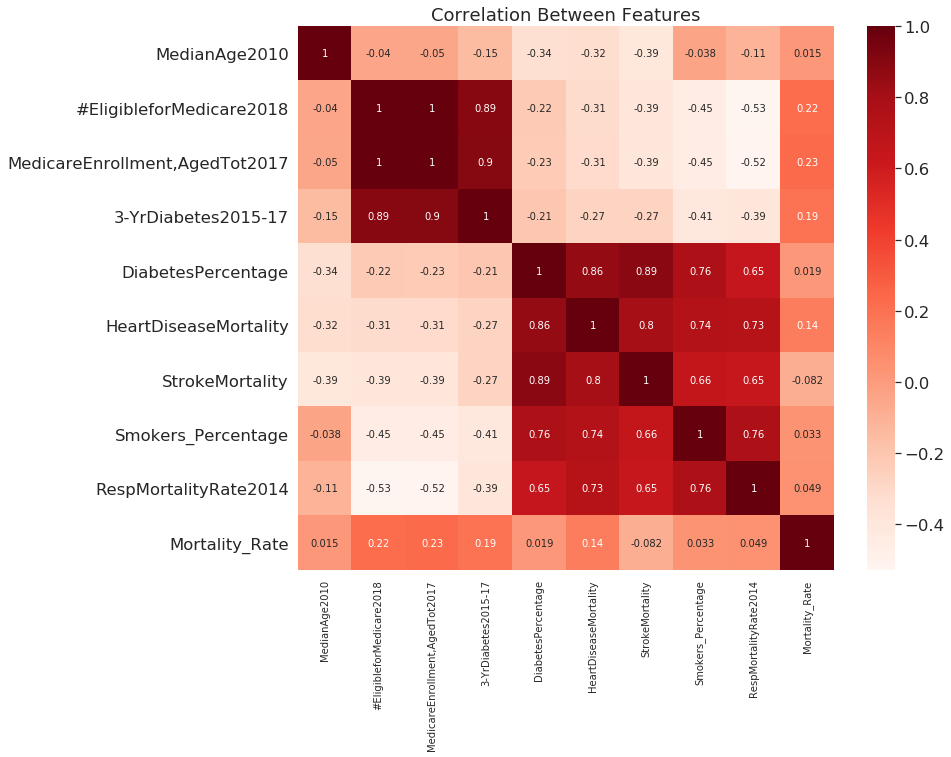

In [50]:
#visualizing features having to do with state's age of population features 


data = X_and_Y[['MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', 'Mortality_Rate']]
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

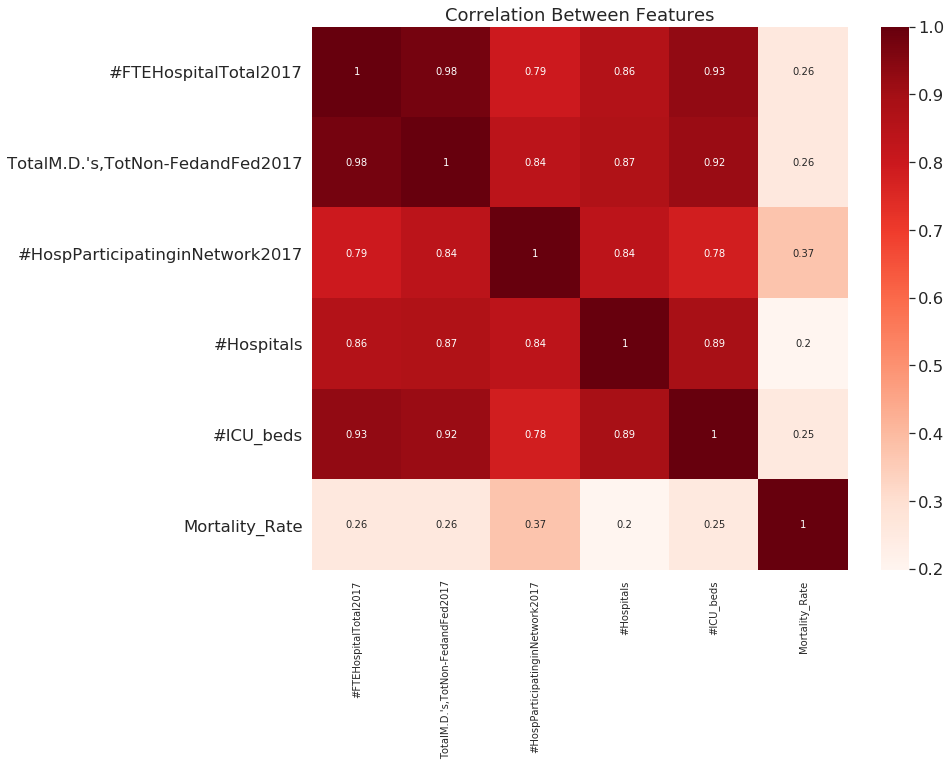

In [51]:
#visualizing features having to do with state hospital resources 

data = X_and_Y[['#FTEHospitalTotal2017',
       "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'Mortality_Rate']]
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

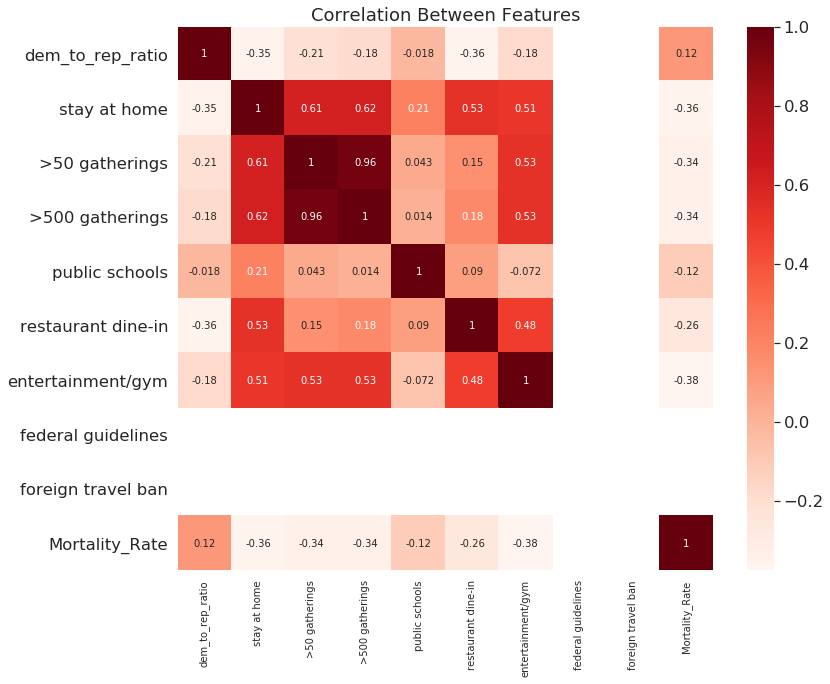

In [52]:
#policy related features
data = X_and_Y[['dem_to_rep_ratio', 'stay at home',
       '>50 gatherings', '>500 gatherings', 'public schools',
       'restaurant dine-in', 'entertainment/gym', 'federal guidelines',
       'foreign travel ban', 'Mortality_Rate']]
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()       

In [55]:
#try ridge regression & lasso regularization to add reg param and remove uninformative features. 

In [70]:
from sklearn.linear_model import RidgeCV
alphas = np.linspace(0.5, 3, 30)

ridge_model = RidgeCV(alphas=alphas)
ridge_model.fit(normalized_X_train, Y_train)


print('Training RMSE:', rmse_score(ridge_model, normalized_X_train, Y_train))
print('Cross Validation (RMSE) scores:', cross_val_score(ridge_model, normalized_X_train, Y_train, scoring=rmse_score, cv=5))
print('Mean CV RMSE score:', np.mean(cross_val_score(ridge_model, normalized_X_train, Y_train, cv=5, scoring=rmse_score)))

Training RMSE: 1.0234375945246084
Cross Validation (RMSE) scores: [1.39062907 1.62663185 1.73514015 2.06314835 2.16544815]
Mean CV RMSE score: 1.7961995141373321


In [71]:
#better performance because it limited our model from overfitting w/ regularization parameter

In [72]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

In [73]:
#Lasso Regression WITHOUT NORMALIZATION to see the change in results
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(cv=5, max_iter=100000)
lasso_model.fit(X_train, Y_train)


print('Training RMSE:', rmse_score(lasso_model, X_train, Y_train))
print('Cross Validation (RMSE) scores:', cross_val_score(lasso_model, X_train, Y_train, scoring=rmse_score, cv=5))
print('Mean CV RMSE score:', np.mean(cross_val_score(lasso_model, X_train, Y_train, cv=5, scoring=rmse_score)))

Training RMSE: 1.4057414395964416
Cross Validation (RMSE) scores: [1.26279082 1.5360268  1.67685954 2.09500513 1.29647099]
Mean CV RMSE score: 1.5734306543991028


In [74]:
print('Kept Columns (CoE not close to 0):', X_train.columns[~np.isclose(lasso_model.coef_, 0)])

Kept Columns (CoE not close to 0): Index(['PopulationEstimate2018', 'MedicareEnrollment,AgedTot2017',
       'People_Tested'],
      dtype='object')


In [75]:
[c for c in lasso_model.coef_ if ~np.isclose(c, 0)]

[-1.2188239624998807e-06, 1.25854867449892e-05, 5.91069657406095e-06]

In [77]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(fit_intercept=True)
sgd_model.fit(normalized_X_train, Y_train)

training_rmse = rmse_score(sgd_model, normalized_X_train, Y_train)
cv_scores = cross_val_score(sgd_model, normalized_X_train, Y_train, scoring=rmse_score, cv=5)
mean_cv_score = np.mean(cross_val_score(sgd_model, normalized_X_train, Y_train, cv=5, scoring=rmse_score))

print('Training RMSE:', training_rmse)
print('Cross Validation (RMSE) scores:', cv_scores)
print('Mean CV RMSE score:', mean_cv_score)

Training RMSE: 1.0626719455787577
Cross Validation (RMSE) scores: [1.14849118 1.67338791 2.22146531 2.2237659  1.79991109]
Mean CV RMSE score: 1.8048438979186083


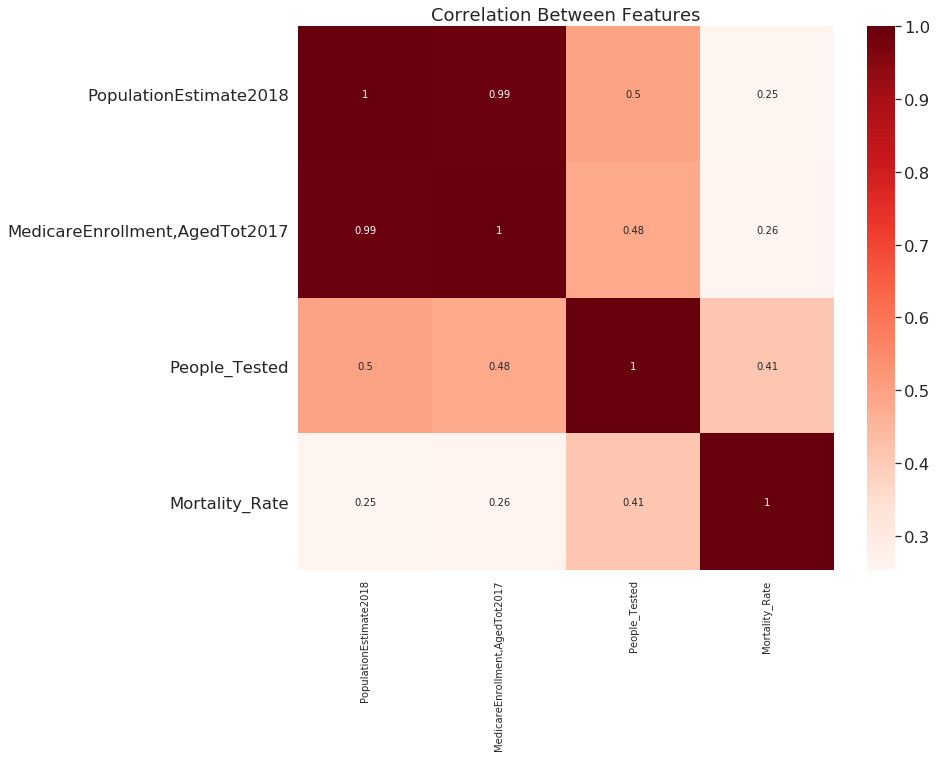

In [78]:
data = X_train[['PopulationEstimate2018', 'MedicareEnrollment,AgedTot2017',
       'People_Tested']]
data['Mortality_Rate']=Y_train
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()       

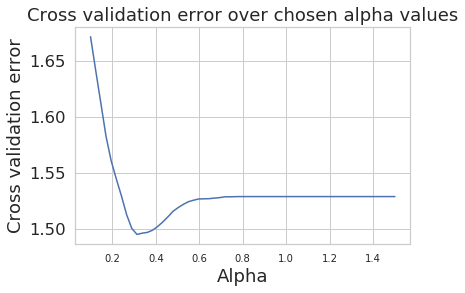

The best alpha value is 0.31355932203389825
Cross validation error for the best alpha value is 1.4947892498206699


In [79]:
#lasso model with STANDARDIZED DATA and manual CV to determine alpha that minimizes cross validation error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

alpha_arr = np.linspace(0.1, 1.5, 60)
cv_errors = []
model = Pipeline([
    ("transformer", StandardScaler()),
    ("LinearModel", Lasso())])

for alpha in alpha_arr:
    model.set_params(LinearModel__alpha=alpha)

    # compute the cross validation error
    cv_error = cross_val_score(model, normalized_X_train, Y_train, scoring=rmse_score).mean()
    
    cv_errors.append(cv_error)
    
best_alpha_lasso = alpha_arr[np.argmin(cv_errors)]

plt.plot(alpha_arr, cv_errors)
plt.title('Cross validation error over chosen alpha values')
plt.xlabel('Alpha')
plt.ylabel('Cross validation error')
plt.show()

print(f"The best alpha value is {best_alpha_lasso}")
print(f"Cross validation error for the best alpha value is {cv_errors[np.argmin(cv_errors)]}")

In [81]:
norm_lasso_model = Lasso(alpha=0.31355932203389825, max_iter=1000000)#, tol=0.001)
norm_lasso_model.fit(normalized_X_train, Y_train)

training_rmse = rmse_score(norm_lasso_model, normalized_X_train, Y_train)
cv_scores = cross_val_score(norm_lasso_model, normalized_X_train, Y_train, scoring=rmse_score, cv=5)
mean_cv_score = np.mean(cross_val_score(norm_lasso_model, normalized_X_train, Y_train, cv=5, scoring=rmse_score))

print('Training RMSE:', training_rmse)
print('Cross Validation (RMSE) scores:', cv_scores)
print('Mean CV RMSE score:', mean_cv_score)

Training RMSE: 1.3719068707526985
Cross Validation (RMSE) scores: [0.97985126 1.49598477 1.53656083 2.08241512 1.36478737]
Mean CV RMSE score: 1.4919198714537458


In [82]:
kept_columns = X_train.columns[~np.isclose(norm_lasso_model.coef_, 0)]
print('Kept Columns (CoE not close to 0):', kept_columns)

Kept Columns (CoE not close to 0): Index(['#HospParticipatinginNetwork2017', 'stay at home', '>50 gatherings',
       'entertainment/gym', 'People_Tested'],
      dtype='object')


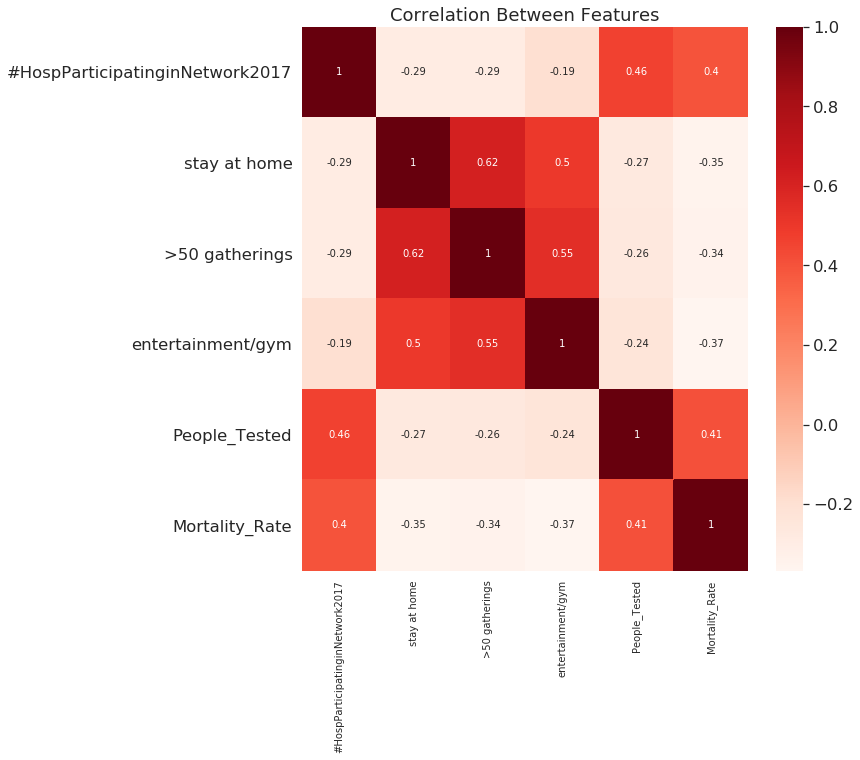

In [83]:
#visualizing corr heat map between 'kept features'
data = X_train[['#HospParticipatinginNetwork2017', 'stay at home', '>50 gatherings',
       'entertainment/gym', 'People_Tested']]
data['Mortality_Rate']=Y_train
plt.figure(figsize=(10,10))
cor = data.corr()
plt.xlabel('Model Feature')
plt.rc('xtick', labelsize=15) 
plt.xticks(rotation=20)
plt.ylabel('Model Feature')
plt.title('Correlation Between Features')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()   

In [89]:
#inspection of chosen coefficients
print([c for c in norm_lasso_model.coef_ if ~np.isclose(c, 0)])

[0.17358975485466227, -0.034588366373123826, -0.01439528690756636, -0.1493745627123347, 0.19478077989075585]


In [90]:
#FINAL PERFORMANCE ON TEST DATA 


X_test = test.drop(columns={'Mortality_Rate'})

normalized_X_test = (X_test-X_test.mean())/(X_test.std())
fed_zero_indices = normalized_X_test[normalized_X_test['federal guidelines'].isnull()].index
normalized_X_test = normalized_X_test.set_value(fed_zero_indices, 'federal guidelines', 0)
normalized_X_test = normalized_X_test.set_value(fed_zero_indices, 'foreign travel ban', 0)
#print(normalized_X_test.isnull().sum())

Y_test = test['Mortality_Rate']
Y_hat = norm_lasso_model.predict(normalized_X_test)
training_rmse = rmse_score(norm_lasso_model, normalized_X_test, Y_test)

print('Test RMSE:', training_rmse)

Test RMSE: 0.9167907677753064


/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



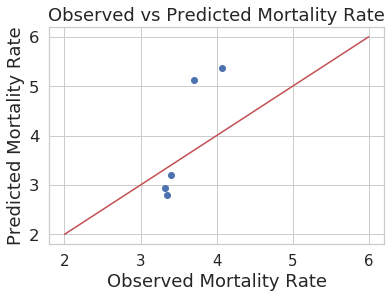

In [91]:
#visualizing results


xaxis_min_bound= Y_test.min()-1
xaxis_max_bound = Y_test.max()+1
x=(2,6)

#plt.scatter(np.arange(0,5), Y_test)
plt.scatter(Y_hat, Y_test)
plt.ylabel('Predicted Mortality Rate')
plt.xlabel('Observed Mortality Rate')
plt.plot(x,x, c='r')
plt.title('Observed vs Predicted Mortality Rate');